In [1]:
import ROOT as root
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

Welcome to JupyROOT 6.28/04


In [2]:
f = root.TFile("../output.root")
f.ls()

myTree = f.Get("tree")

entries = myTree.GetEntriesFast()

myTree.Show(1)
myTree.Print()

TFile**		../output.root	myFile
 TFile*		../output.root	myFile
  KEY: TTree	tree;1	Tree for storing Geant4 data
======> EVENT:1
 energyDep       = 1.5905
 positionX       = -6.28273
 positionY       = 0.525733
 positionZ       = 24.3177
******************************************************************************
*Tree    :tree      : Tree for storing Geant4 data                           *
*Entries :      150 : Total =            7556 bytes  File  Size =       5620 *
*        :          : Tree compression factor =   1.01                       *
******************************************************************************
*Br    0 :energyDep : energyDep/D                                            *
*Entries :      150 : Total  Size=       1789 bytes  File Size  =       1259 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.01     *
*............................................................................*
*Br    1 :positionX : positionX/D                    

In [3]:
fName = "../output.root"
tName = "tree"

f = root.TFile(fName)
myTree = f.Get(tName)

myTree.Print()

root.EnableImplicitMT()
d = root.RDataFrame(tName,fName)

******************************************************************************
*Tree    :tree      : Tree for storing Geant4 data                           *
*Entries :      150 : Total =            7540 bytes  File  Size =       5620 *
*        :          : Tree compression factor =   1.01                       *
******************************************************************************
*Br    0 :energyDep : energyDep/D                                            *
*Entries :      150 : Total  Size=       1785 bytes  File Size  =       1259 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.01     *
*............................................................................*
*Br    1 :positionX : positionX/D                                            *
*Entries :      150 : Total  Size=       1785 bytes  File Size  =       1262 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.01     *
*...................................................

In [4]:
triggerCode = '''
auto fileName = "../output.root";
auto treeName = "tree";

TFile* f = new TFile((TString)fileName,"READ");
TTree* t = (TTree*)f->Get(treeName);

bool getTrigger(double edep, double x, double y, double z) {
    return true;
    }
'''

root.gInterpreter.Declare(triggerCode)

True

In [6]:
fdf = d.Define("trigger", "getTrigger(energyDep, positionX, positionY, positionZ)")

triggers = fdf.Filter("trigger==true").Count()
print('{} entries passed trigger'.format(triggers.GetValue()))

fdft = fdf.Filter("trigger==true")

150 entries passed trigger


Info in <TCanvas::Print>: pdf file basic_plots.pdf has been created


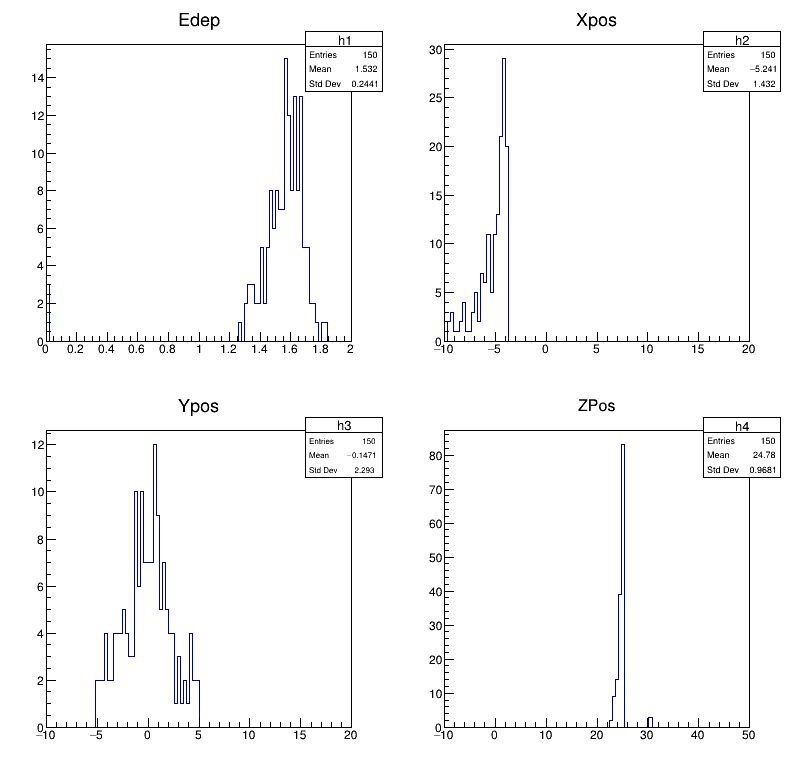

In [7]:
# Canvas 1
hEdep = fdft.Histo1D(("h1", "Edep", 100, 0.0, 2.0),'energyDep')
hXpos = fdft.Histo1D(("h2", "Xpos", 100, -10.0, 20.0),'positionX')
hYpos = fdft.Histo1D(("h3", "Ypos", 100, -10.0, 20.0),'positionY')
hZpos = fdft.Histo1D(("h4", "ZPos", 100, -10.0, 50.0),'positionZ')

c1 = root.TCanvas("c1","c1",800,800)
c1.Divide(2,2,0.01,0.01,0)

c1.cd(1)
hEdep.Draw()
c1.cd(2)
hXpos.Draw()
c1.cd(3)
hYpos.Draw()
c1.cd(4)
hZpos.Draw()

c1.Draw()
c1.Print("basic_plots.pdf");